In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB as NB
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
sns.set()

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

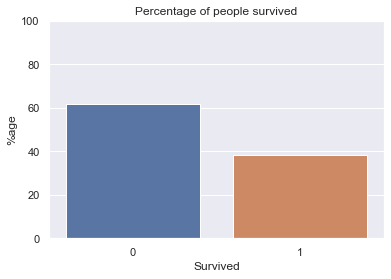

In [6]:
# no. of passengers survived or died
df['Survived'].value_counts()
ax=sns.countplot(df['Survived'])
for i in ax.patches:
    i.set_height(i.get_height()/len(df)*100)
plt.ylim(0,100)
plt.xlabel('Survived')
plt.ylabel('%age')
plt.title("Percentage of people survived")
plt.show()

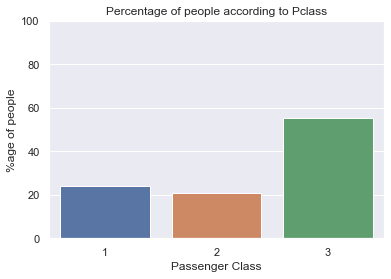

In [7]:
# percentage of people according to the PClass
ax=sns.countplot(df['Pclass'])
for i in ax.patches:
    i.set_height(i.get_height()/len(df)*100)
plt.xlabel("Passenger Class")
plt.ylabel("%age of people")
plt.title("Percentage of people according to Pclass")
plt.ylim(0,100)
plt.show()

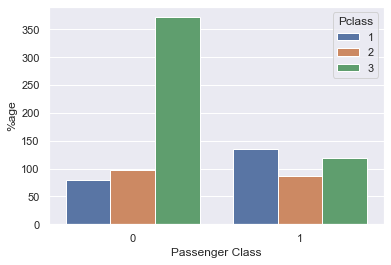

In [8]:
# No.of people in passenger class
df['Pclass'].value_counts()
ax=sns.countplot(df['Survived'],hue=df['Pclass'])
cnt=0
plt.xlabel('Passenger Class')
plt.ylabel('%age')
plt.show()

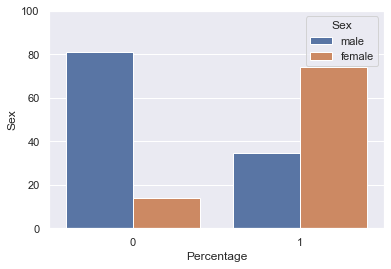

In [9]:
# number of males/females
df['Sex'].value_counts()
ax=sns.countplot('Survived', hue='Sex',data=df)
for i in ax.patches:
    if round(i.get_x()+1.4)==1:
        n=len(df[df['Sex']=='male'])
    else:
        n=len(df[df['Sex']=='female'])
        
    i.set_height(i.get_height()/n*100)
plt.xlabel('Percentage')
plt.ylabel('Sex')
plt.ylim(0,100)
plt.show()
    

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


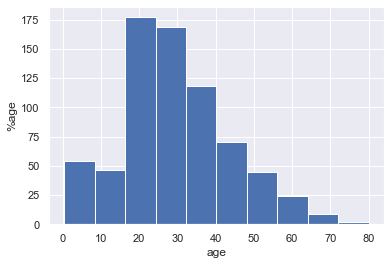

In [11]:
ax=plt.hist(df['Age'])
plt.ylabel('%age')
plt.xlabel('age')
plt.show()

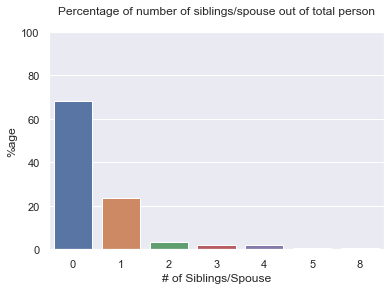

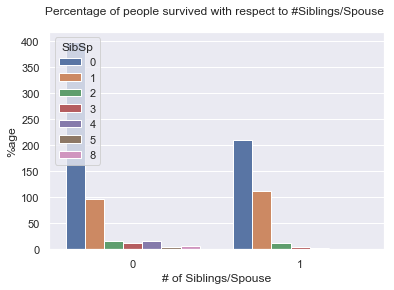

In [12]:
# distribution of no. of Siblings/Spouse
ax=sns.countplot(x='SibSp',data=df, ax=plt.axes(ylim=(0,100)))
for i in ax.patches:
    i.set_height(i.get_height()/len(df)*100)
plt.xlabel('# of Siblings/Spouse')
plt.ylabel('%age')
plt.title('Percentage of number of siblings/spouse out of total person\n')
plt.show()

ax=sns.countplot(hue='SibSp', x='Survived', data=df)
plt.xlabel('# of Siblings/Spouse')
plt.ylabel('%age')
plt.title('Percentage of people survived with respect to #Siblings/Spouse \n')
plt.show()

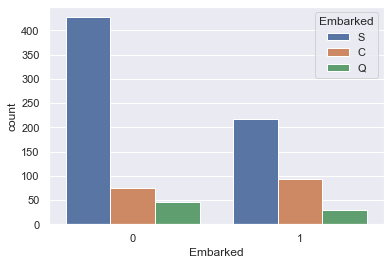

In [13]:
ax=sns.countplot(x='Survived',hue='Embarked', data=df)
plt.xlabel('Embarked')
plt.show()

# Data Cleaning

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# one hot encoding on sex column
sex=pd.get_dummies(df['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [16]:
# one hot encoding on Embarked column
embark=pd.get_dummies(df['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [17]:
# dropping unnecessary columns
df.drop(['Name','Cabin','Ticket','Embarked','Sex','PassengerId'],axis=1,inplace=True)

In [18]:
df=pd.concat([df,sex,embark],axis=1)

In [19]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [20]:
np.sum(df['Age'].isna())

177

In [21]:
imp=SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(np.array(df['Age']).reshape(-1,1))
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [22]:
sc=StandardScaler()
arr=(df[['Age','Fare']])
d=sc.fit_transform(arr)
df['Age'],df['Fare']=d.T[0],d.T[1]

In [23]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,-0.592481,1,0,-0.502445,0,1,0,0,1
1,1,1,0.638789,1,0,0.786845,1,0,1,0,0
2,1,3,-0.284663,0,0,-0.488854,1,0,0,0,1
3,1,1,0.407926,1,0,0.420730,1,0,0,0,1
4,0,3,0.407926,0,0,-0.486337,0,1,0,0,1


In [24]:
df['Survived'].value_counts()/len(df)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [25]:
y=df['Survived']
X=df.drop('Survived',axis=1)
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
_

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Splitting Data into training and cross-validation data

In [27]:
# training naive bayes model with default parameters
model=LogisticRegression(class_weight='balanced',max_iter=100000)
model.fit(X_train,y_train)
model.score(X_cv,y_cv)

0.7947761194029851

In [28]:
# performing GridSearch to find best value of hyperparameter(alpha)
gc=GridSearchCV(model,cv=10,param_grid={'C':[0.001,0.01,0.1,1,10,100,1000]},scoring='accuracy')
gc.fit(X_train,y_train)
print(gc.best_estimator_)
gc.best_score_

LogisticRegression(C=1000, class_weight='balanced', max_iter=100000)


0.786584741423451

In [29]:
train_er=[]
test_er=[]
h_parm=[0.001,0.01,0.1,0,10,100,1000,10000]
for i in h_parm:
    model.C=i
    model.gamma=j
    cv=cross_validate(model,X_train,y_train,return_train_score=True,cv=10)
    train_er.append(np.mean(cv['train_score']))
    test_er.append(np.mean(cv['test_score']))
    

NameError: name 'j' is not defined

ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

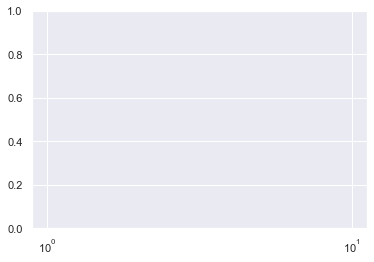

In [30]:
plt.semilogx(h_parm,train_er,label='Train_error')
plt.semilogx(h_parm,test_er,label='Test_error')
plt.legend()
plt.show()

In [31]:
# training model with best value of hyperparameter 
model.C=100
model.score(X_cv,y_cv)

0.7947761194029851

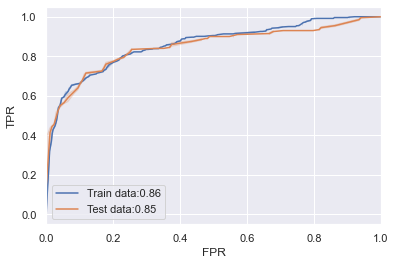

In [35]:
# drawing roc_curve and confusion matrix for training and cross-validation data
prob1=model.predict_proba(X_train)[:,1]
prob2=model.predict_proba(X_cv)[:,1]
fpr1,tpr1,_=roc_curve(y_train,prob1)
fpr2,tpr2,_=roc_curve(y_cv,prob2)

auc1=roc_auc_score(y_train,prob1)
auc2=roc_auc_score(y_cv,prob2)

sns.lineplot(fpr1,tpr1,label='Train data:{:0.2f}'.format(auc1))
sns.lineplot(fpr2,tpr2,label='Test data:{:0.2f}'.format(auc2))
plt.xlim(0,1)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

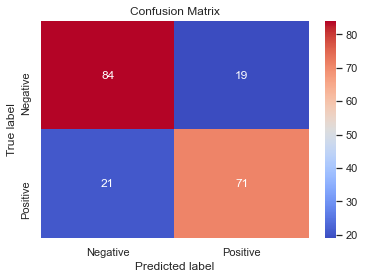

In [37]:
y_pred=model.predict(X_cv)
con=confusion_matrix(y_cv,y_pred)
d=pd.DataFrame(con,index=['Negative','Positive'],columns=['Negative','Positive'])
con[0]=con[0]/161*100
con[1]=con[1]/107*100
sns.heatmap(d,annot=True,fmt='d',cmap="coolwarm")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [38]:
y_pred=model.predict(X_cv)
print(f1_score(y_cv,y_pred))

0.7368421052631579


# Accuracy on Test Data

In [39]:
df_test=pd.read_csv("test.csv")
p_id=df_test['PassengerId']

In [40]:
# one hot encoding on sex column
sex=pd.get_dummies(df_test['Sex'])
sex.head()
# one hot encoding on the embarked column
embark=pd.get_dummies(df_test['Embarked'])
embark.head()
# dropping non necessary columns
df_test.drop(['Name','Cabin','Ticket','Embarked','Sex','PassengerId'],axis=1,inplace=True)

df_test=pd.concat([df_test,sex,embark],axis=1)

np.sum(df_test['Age'].isna())
imp=SimpleImputer(strategy='mean')
df_test['Age']=imp.fit_transform(np.array(df_test['Age']).reshape(-1,1))
df_test['Fare']=imp.fit_transform(np.array(df_test['Fare']).reshape(-1,1))

sc=StandardScaler()
arr=(df_test[['Age','Fare']])
d=sc.fit_transform(arr)
df_test['Age'],df_test['Fare']=d.T[0],d.T[1]




In [42]:
arr=model.predict(df_test)
df_score=pd.DataFrame({'PassengerId':p_id,'Survived':arr})

In [43]:
df_score.to_csv("final_score.csv")